In [88]:
import uproot
import matplotlib.pyplot as plt 
import matplotlib as mpl
import mplhep as hep
import numpy as np
import fnmatch
import hist
from tqdm import tqdm
from scipy.signal import find_peaks
import pandas as pd
import os, sys, importlib
import warnings
warnings.filterwarnings("ignore", category=Warning)

importlib.reload(sys.modules['wc_helper'])
from wc_helper import *

In [8]:
# with open("electron_caf.list") as f:
with open("proton_caf.list") as f:
    caf_list = f.read().split('\n')

with open("proton_wvfm.list") as f:
    wvfm_list = f.read().split('\n')
    
# check that we can open all the files 
for i in tqdm(range(len(wvfm_list)-1)):
    if i == 8: continue
    uproot.open(wvfm_list[i])
    uproot.open(caf_list[i])

100%|██████████| 32/32 [00:00<00:00, 83.90it/s]


In [2]:
N=20
u_sim_sum_arr = np.zeros((N*2,idx_v0)); v_sim_sum_arr = np.zeros((N*2,idx_w0-idx_v0)); w_sim_sum_arr = np.zeros((N*2,idx_u1-idx_w0))
u_rej_sum_arr = np.zeros((N*2,idx_v0)); v_rej_sum_arr = np.zeros((N*2,idx_w0-idx_v0)); w_rej_sum_arr = np.zeros((N*2,idx_u1-idx_w0))
u_dec_sum_arr = np.zeros((N*2,idx_v0)); v_dec_sum_arr = np.zeros((N*2,idx_w0-idx_v0)); w_dec_sum_arr = np.zeros((N*2,idx_u1-idx_w0))
u_gho_sum_arr = np.zeros((N*2,idx_v0)); v_gho_sum_arr = np.zeros((N*2,idx_w0-idx_v0)); w_gho_sum_arr = np.zeros((N*2,idx_u1-idx_w0))
theta_xz_sum_arr = np.zeros(N*2); depE_sum_arr = np.zeros(N*2)

# iterate over files in directory
for filename in tqdm(os.listdir("./pro_npz_files/")):
    if filename.startswith('.'): continue
    file = np.load("./pro_npz_files/"+filename,allow_pickle=True)
    u_sim_sum_arr = np.concatenate((file["u_sim_sum_arr"],u_sim_sum_arr))
    v_sim_sum_arr = np.concatenate((file["v_sim_sum_arr"],v_sim_sum_arr))
    w_sim_sum_arr = np.concatenate((file["w_sim_sum_arr"],w_sim_sum_arr))
    u_rej_sum_arr = np.concatenate((file["u_sim_rej_arr"],u_rej_sum_arr))
    v_rej_sum_arr = np.concatenate((file["v_sim_rej_arr"],v_rej_sum_arr))
    w_rej_sum_arr = np.concatenate((file["w_sim_rej_arr"],w_rej_sum_arr))
    u_dec_sum_arr = np.concatenate((file["u_dec_sum_arr"],u_dec_sum_arr))
    v_dec_sum_arr = np.concatenate((file["v_dec_sum_arr"],v_dec_sum_arr))
    w_dec_sum_arr = np.concatenate((file["w_dec_sum_arr"],w_dec_sum_arr))
    u_gho_sum_arr = np.concatenate((file["u_gho_sum_arr"],u_gho_sum_arr))
    w_gho_sum_arr = np.concatenate((file["w_gho_sum_arr"],w_gho_sum_arr))
    v_gho_sum_arr = np.concatenate((file["v_gho_sum_arr"],v_gho_sum_arr))
    theta_xz_sum_arr = np.concatenate((file["theta_xz_sum_arr"],theta_xz_sum_arr))
    depE_sum_arr = np.concatenate((file["depE_sum_arr"],depE_sum_arr))
# remove the last 40 entries (filled with zeros)
u_sim_sum_arr = u_sim_sum_arr[:-N*2]; v_sim_sum_arr = v_sim_sum_arr[:-N*2]; w_sim_sum_arr = w_sim_sum_arr[:-N*2]
u_rej_sum_arr = u_rej_sum_arr[:-N*2]; v_rej_sum_arr = v_rej_sum_arr[:-N*2]; w_rej_sum_arr = w_rej_sum_arr[:-N*2]
u_dec_sum_arr = u_dec_sum_arr[:-N*2]; v_dec_sum_arr = v_dec_sum_arr[:-N*2]; w_dec_sum_arr = w_dec_sum_arr[:-N*2]
u_gho_sum_arr = u_gho_sum_arr[:-N*2]; v_gho_sum_arr = v_gho_sum_arr[:-N*2]; w_gho_sum_arr = w_gho_sum_arr[:-N*2]
theta_xz_sum_arr = theta_xz_sum_arr[:-N*2]; depE_sum_arr = depE_sum_arr[:-N*2]

100%|██████████| 32/32 [00:02<00:00, 12.76it/s]


In [3]:
mask = theta_xz_sum_arr < 50

u_sim_sum_arr = u_sim_sum_arr[mask]; v_sim_sum_arr = v_sim_sum_arr[mask]; w_sim_sum_arr = w_sim_sum_arr[mask]
u_rej_sum_arr = u_rej_sum_arr[mask]; v_rej_sum_arr = v_rej_sum_arr[mask]; w_rej_sum_arr = w_rej_sum_arr[mask]
u_dec_sum_arr = u_dec_sum_arr[mask]; v_dec_sum_arr = v_dec_sum_arr[mask]; w_dec_sum_arr = w_dec_sum_arr[mask]
u_gho_sum_arr = u_gho_sum_arr[mask]; v_gho_sum_arr = v_gho_sum_arr[mask]; w_gho_sum_arr = w_gho_sum_arr[mask]
theta_xz_sum_arr = theta_xz_sum_arr[mask]; depE_sum_arr = depE_sum_arr[mask]

4it [00:00, 13.61it/s]


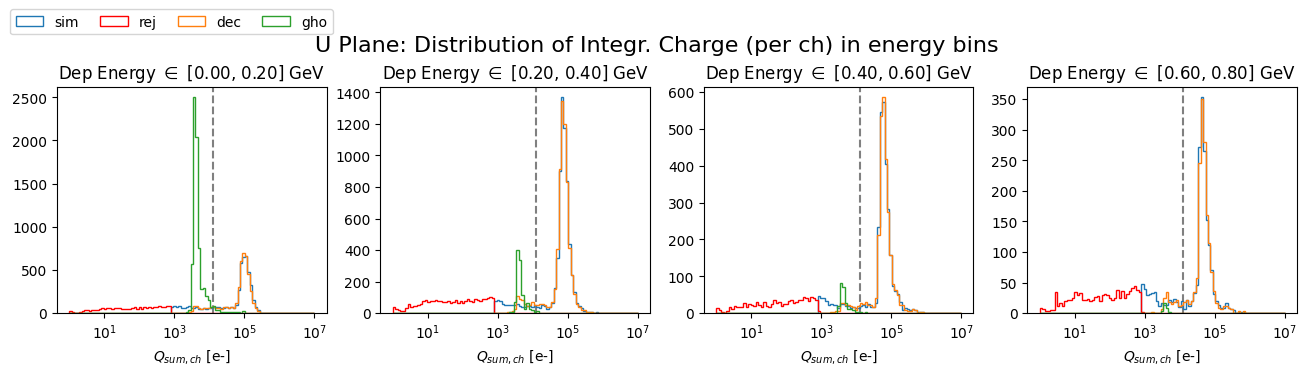

In [4]:
fig, axes = plt.subplots(1,4,figsize=(16,3),sharex=True,dpi=100)
bins = np.logspace(0,7,100)
energy_bins = np.linspace(0,0.8,5)
plt.subplots_adjust(hspace=0.5)

for i, ax in tqdm(enumerate(axes.flatten())):
    lower = energy_bins[i]; upper = energy_bins[i+1]
    mask = (depE_sum_arr>lower) & (depE_sum_arr<upper)
    this_u_sim = np.hstack(u_sim_sum_arr[mask]) if u_sim_sum_arr[mask].size else np.array([]) 
    this_u_rej = np.hstack(u_rej_sum_arr[mask]) if u_rej_sum_arr[mask].size else np.array([])
    this_u_dec = np.hstack(u_dec_sum_arr[mask]) if u_dec_sum_arr[mask].size else np.array([])
    this_u_gho = np.hstack(u_gho_sum_arr[mask]) if u_gho_sum_arr[mask].size else np.array([])
    ax.set_xscale("log")
    ax.tick_params(labelbottom=True)
    ax.hist(this_u_sim,bins=bins,histtype="step",label="sim")
    ax.hist(this_u_rej,bins=bins,histtype="step",label="rej",color="red")
    ax.hist(this_u_dec,bins=bins,histtype="step",label="dec")
    ax.hist(this_u_gho,bins=bins,histtype="step",label="gho")

    ax.set_title(f"Dep Energy $\in$ [{lower:.2f}, {upper:.2f}] GeV")
    if i==0:
        ax.legend(bbox_to_anchor=(-0.2,1.2, 1.25, 1.2), loc="lower left",mode="expand",ncol=4)
    ax.set_xlabel(r"$Q_{sum, ch}$ [e-]")
    ymin, ymax = ax.set_ylim()
    ax.vlines(1.25e4,ymin=ymin,ymax=ymax,linestyles="dashed",colors="gray")
    ax.set_ylim(ymin,ymax)

plt.suptitle("U Plane: Distribution of Integr. Charge (per ch) in energy bins",y=1.05,fontsize=16)
plt.show()

1it [00:00,  4.82it/s]

4it [00:00, 13.19it/s]


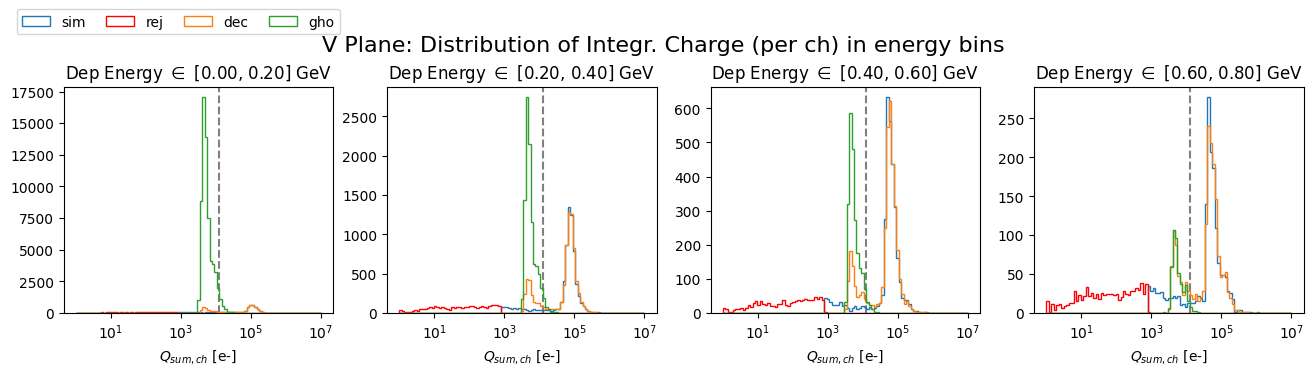

In [5]:
fig, axes = plt.subplots(1,4,figsize=(16,3),sharex=True,dpi=100)
bins = np.logspace(0,7,100)
energy_bins = np.linspace(0,0.8,5)
plt.subplots_adjust(hspace=0.5)
for i, ax in tqdm(enumerate(axes.flatten())):
    lower = energy_bins[i]; upper = energy_bins[i+1]
    mask = (depE_sum_arr>lower) & (depE_sum_arr<upper)
    this_v_sim = np.hstack(v_sim_sum_arr[mask]) if v_sim_sum_arr[mask].size else np.array([]) 
    this_v_rej = np.hstack(v_rej_sum_arr[mask]) if v_rej_sum_arr[mask].size else np.array([])
    this_v_dec = np.hstack(v_dec_sum_arr[mask]) if v_dec_sum_arr[mask].size else np.array([])
    this_v_gho = np.hstack(v_gho_sum_arr[mask]) if v_gho_sum_arr[mask].size else np.array([])
    ax.set_xscale("log")
    ax.tick_params(labelbottom=True)
    ax.hist(this_v_sim,bins=bins,histtype="step",label="sim")
    ax.hist(this_v_rej,bins=bins,histtype="step",label="rej",color="red")
    ax.hist(this_v_dec,bins=bins,histtype="step",label="dec")
    ax.hist(this_v_gho,bins=bins,histtype="step",label="gho")

    ax.set_title(f"Dep Energy $\in$ [{lower:.2f}, {upper:.2f}] GeV")
    if i==0:
        ax.legend(bbox_to_anchor=(-0.2,1.2, 1.25, 1.2), loc="lower left",mode="expand",ncol=4)
    ax.set_xlabel(r"$Q_{sum, ch}$ [e-]")
    ymin, ymax = ax.set_ylim()
    ax.vlines(1.25e4,ymin=ymin,ymax=ymax,linestyles="dashed",colors="gray")
    ax.set_ylim(ymin,ymax)

plt.suptitle("V Plane: Distribution of Integr. Charge (per ch) in energy bins",y=1.05,fontsize=16)
plt.show()

4it [00:00, 15.17it/s]


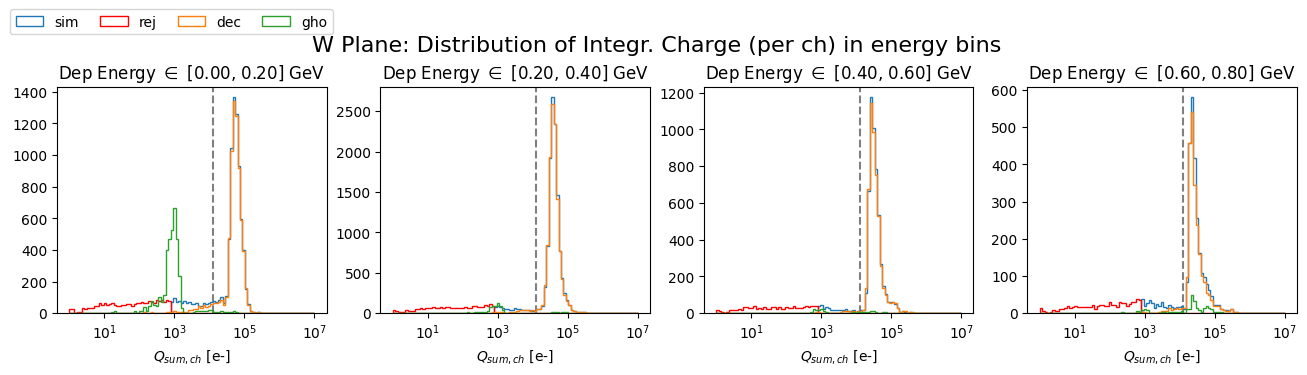

In [6]:
fig, axes = plt.subplots(1,4,figsize=(16,3),sharex=True,dpi=100)
bins = np.logspace(0,7,100)
energy_bins = np.linspace(0,0.8,5)
plt.subplots_adjust(hspace=0.5)

for i, ax in tqdm(enumerate(axes.flatten())):
    lower = energy_bins[i]; upper = energy_bins[i+1]
    mask = (depE_sum_arr>lower) & (depE_sum_arr<upper)
    this_w_sim = np.hstack(w_sim_sum_arr[mask]) if w_sim_sum_arr[mask].size else np.array([]) 
    this_w_rej = np.hstack(w_rej_sum_arr[mask]) if w_rej_sum_arr[mask].size else np.array([])
    this_w_dec = np.hstack(w_dec_sum_arr[mask]) if w_dec_sum_arr[mask].size else np.array([])
    this_w_gho = np.hstack(w_gho_sum_arr[mask]) if w_gho_sum_arr[mask].size else np.array([])
    ax.set_xscale("log")
    ax.tick_params(labelbottom=True)
    ax.hist(this_w_sim,bins=bins,histtype="step",label="sim")
    ax.hist(this_w_rej,bins=bins,histtype="step",label="rej",color="red")
    ax.hist(this_w_dec,bins=bins,histtype="step",label="dec")
    ax.hist(this_w_gho,bins=bins,histtype="step",label="gho")

    ax.set_title(f"Dep Energy $\in$ [{lower:.2f}, {upper:.2f}] GeV")
    if i==0:
        ax.legend(bbox_to_anchor=(-0.2,1.2, 1.25, 1.2), loc="lower left",mode="expand",ncol=4)
    ax.set_xlabel(r"$Q_{sum, ch}$ [e-]")
    ymin, ymax = ax.set_ylim()
    ax.vlines(1.25e4,ymin=ymin,ymax=ymax,linestyles="dashed",colors="gray")
    ax.set_ylim(ymin,ymax)

plt.suptitle("W Plane: Distribution of Integr. Charge (per ch) in energy bins",y=1.05,fontsize=16)
plt.show()

In [44]:
file_idx = 3
caf = uproot.open(caf_list[file_idx]+":recTree")
tree = caf.arrays(["rec.hdr.run","rec.hdr.subrun","rec.hdr.evt",
                "rec.mc.nu.prim.startp.x" ,"rec.mc.nu.prim.startp.y","rec.mc.nu.prim.startp.z",
                "rec.mc.nu.prim.startE","rec.mc.nu.prim.endE"],library='pd')
tree["theta_xz"] = np.arctan(abs(tree["rec.mc.nu.prim.startp.x"]/tree["rec.mc.nu.prim.startp.z"]))*(180/np.pi)
tree["depE"] =  tree["rec.mc.nu.prim.startE"] - tree["rec.mc.nu.prim.endE"]
tree["tpc"] = np.where(tree["rec.mc.nu.prim.startp.x"]>0,1,0)
tree[(tree.depE>0.2)]

,,rec.hdr.run,rec.hdr.subrun,rec.hdr.evt,rec.mc.nu.prim.startp.x,rec.mc.nu.prim.startp.y,rec.mc.nu.prim.startp.z,rec.mc.nu.prim.startE,rec.mc.nu.prim.endE,theta_xz,depE,tpc
entry,subentry,,,,,,,,,,,
1,1,1,3,2,-0.721383,0.0,0.233725,1.206389,0.938272,72.047882,0.268117,0
3,0,1,3,4,0.392094,0.0,0.684147,1.225622,0.938272,29.817625,0.287350,1
6,0,1,3,7,0.539757,0.0,0.536101,1.207930,0.938272,45.194710,0.269658,1
15,1,1,3,16,-0.564630,0.0,0.636279,1.266496,0.938272,41.585663,0.328224,0
17,1,1,3,18,-0.053166,0.0,0.667573,1.152751,0.938272,4.553463,0.214479,0


In [64]:
wvfm = uproot.open(wvfm_list[file_idx])
dec_names = fnmatch.filter(wvfm.keys(), '*run_*_sub_*_evt_*_decon*')
sim_names = fnmatch.filter(wvfm.keys(), '*run_*_sub_*_evt_*_sim*')
raw_names = fnmatch.filter(wvfm.keys(), '*run_*_sub_*_evt_*_raw*')

evtnum = 15; tpc = 0
sim = wvfm[sim_names[evtnum]].to_numpy()
dec = wvfm[dec_names[evtnum]].to_numpy()
raw = wvfm[raw_names[evtnum]].to_numpy()

event_df = tree[(tree["rec.hdr.evt"]==evtnum+1) & (tree.tpc ==tpc)]
col_angle = round(event_df["theta_xz"].values[0],2)
ind_angle = prime_angle(col_angle)
energy = round(event_df["depE"].values[0],2)
nonzero_ch = np.where(np.sum(sim[0],axis=1)>2500)[0]

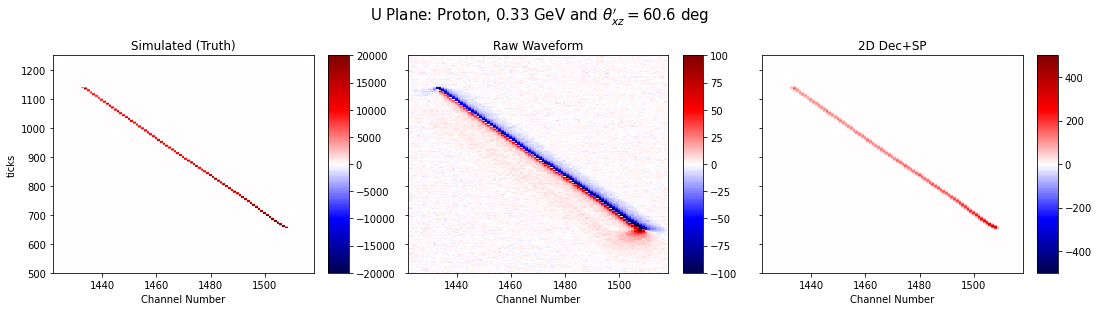

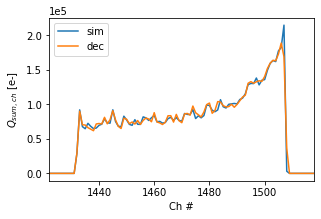

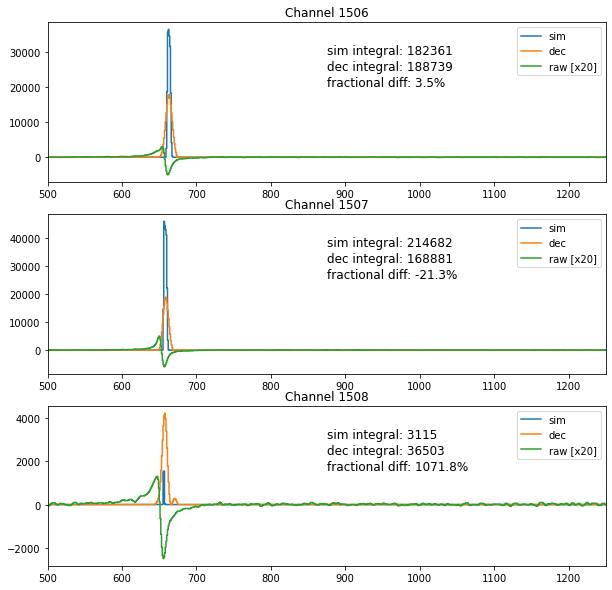

In [96]:
ch_min = np.min( nonzero_ch[(nonzero_ch > idx_u0) & (nonzero_ch < idx_v0)])-10
ch_max = np.max( nonzero_ch[(nonzero_ch > idx_u0) & (nonzero_ch < idx_v0)])+10

plot_evt(ch_min,ch_max,sim,raw,dec,ymin=500,ymax=1250,title=fr"U Plane: Proton, {energy:.2f} GeV and $\theta_{{xz}}' = ${ind_angle} deg")

plt.figure(figsize=(4.75,3))
plt.plot(np.arange(idx_u0,idx_v0),(np.sum(u0_ch(sim[0]),axis=1))   ,label="sim")
plt.plot(np.arange(idx_u0,idx_v0),(np.sum(u0_ch(dec[0])*50,axis=1)),label="dec")
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
plt.xlim(ch_min,ch_max)
plt.legend()
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
plt.ylabel(r"$Q_{sum,ch}$ [e-]")
plt.xlabel("Ch #")
plt.show()

plot_wvfms(chnum=1507,wvfm=wvfm,sim_names=sim_names,dec_names=dec_names,raw_names=raw_names,evtnum=evtnum,range=[500,1250])

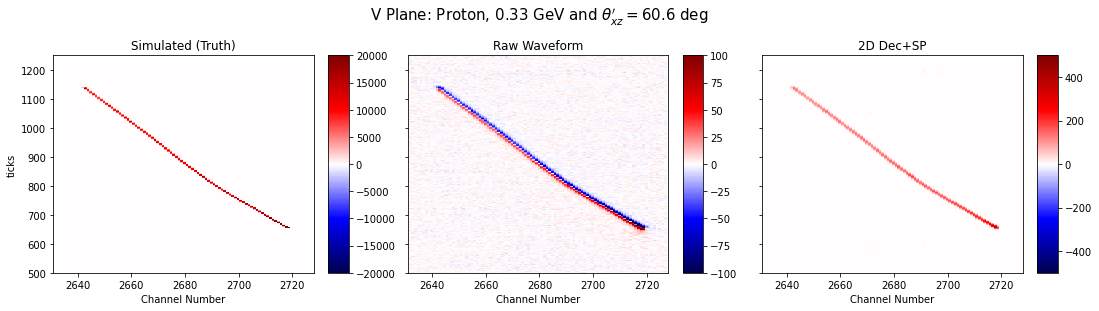

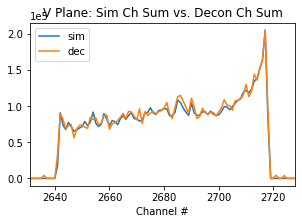

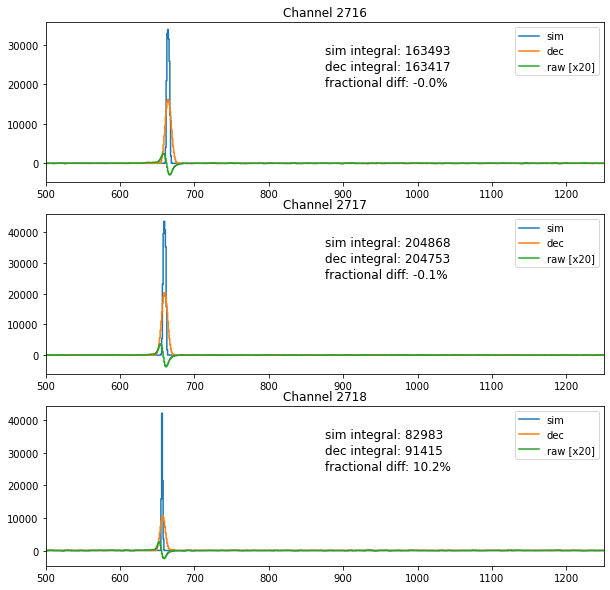

In [89]:
ch_min = np.min( nonzero_ch[(nonzero_ch > idx_v0) & (nonzero_ch < idx_w0)])-10
ch_max = np.max( nonzero_ch[(nonzero_ch > idx_v0) & (nonzero_ch < idx_w0)])+10

plot_evt(ch_min,ch_max,sim,raw,dec,ymin=500,ymax=1250,title=fr"V Plane: Proton, {energy:.2f} GeV and $\theta_{{xz}}' = ${ind_angle} deg")

plt.figure(figsize=(4.75,3))
plt.plot(np.arange(idx_v0,idx_w0),(np.sum(v0_ch(sim[0]),axis=1))   ,label="sim")
plt.plot(np.arange(idx_v0,idx_w0),(np.sum(v0_ch(dec[0])*50,axis=1)),label="dec")
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
plt.xlim(ch_min,ch_max)
plt.title("V Plane: Sim Ch Sum vs. Decon Ch Sum")
plt.legend()
plt.xlabel("Channel #")
plt.show()

plot_wvfms(chnum=2717,wvfm=wvfm,sim_names=sim_names,dec_names=dec_names,raw_names=raw_names,evtnum=evtnum,range=[500,1250])

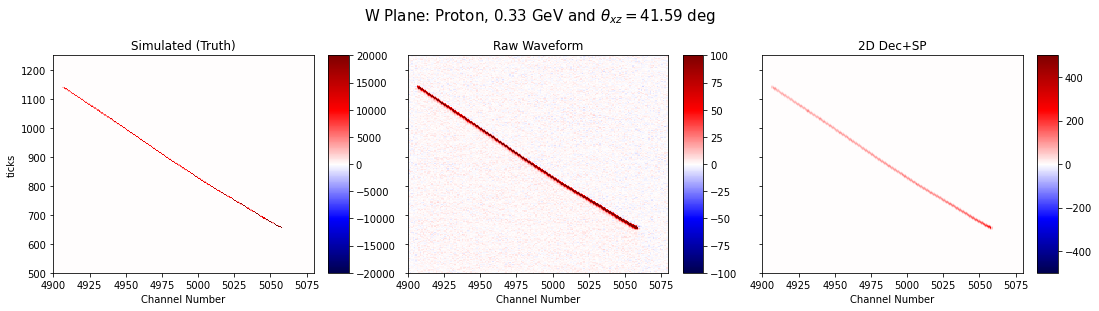

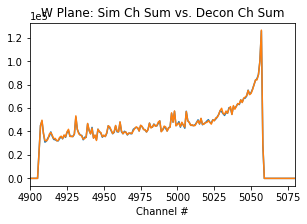

In [80]:
ch_min = 4900
ch_max = 5080

plot_evt(ch_min,ch_max,sim,raw,dec,ymin=500,ymax=1250,title=fr"W Plane: Proton, {energy:.2f} GeV and $\theta_{{xz}} = ${col_angle:.2f} deg")

plt.figure(figsize=(4.75,3))
plt.plot(np.arange(idx_w0,idx_u1),(np.sum(w0_ch(sim[0]),axis=1)))
plt.plot(np.arange(idx_w0,idx_u1),(np.sum(w0_ch(dec[0])*50,axis=1)))
plt.ticklabel_format(axis="y",style="sci",scilimits=(0,0))
plt.xlim(ch_min,ch_max)
plt.title("W Plane: Sim Ch Sum vs. Decon Ch Sum")
plt.xlabel("Channel #")
plt.show()